In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-04T16:34:10.422705+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Alpha+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8835067749023438e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.5041918754577637}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.004028797149658203}
!!! {"init_...": 0.0005674362182617188}
!!! {"ete3Tree": 0.6567635536193848}
!!! {"GenomeTree_hierarchical": 0.003024578094482422}
!!! {"mutateBranchETEhierarchy": 0.09585332870483398}
!!! {"write_genome_short": 0.04967498779296875}


  4%|▎         | 7/193 [00:03<01:03,  2.94it/s]

!!! {"writeGenomeNoIndels": 0.1704108715057373}
!!! {"pl.DataFrame": 0.045960426330566406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0318841934204102}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.017424345016479492}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003607034683227539}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001430511474609375}
!!! {"init_...": 0.0004999637603759766}
!!! {"ete3Tree": 7.581710815429688e-05}
!!! {"GenomeTree_hierarchical": 0.002225637435913086}
!!! {"mutateBranchETEhierarchy": 1.3113021850585938e-05}
!!! {"write_genome_short": 6.72340393066406

 10%|█         | 20/193 [00:03<00:15, 11.07it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=103, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0036728382110595703}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014543533325195312}
!!! {"init_...": 0.0004875659942626953}
!!! {"ete3Tree": 0.0008723735809326172}
!!! {"GenomeTree_hierarchical": 0.0030422210693359375}
!!! {"mutateBranchETEhierarchy": 0.00016880035400390625}
!!! {"write_genome_short": 0.00015091896057128906}
!!! {"writeGenomeNoIndels": 0.000240325927734375}
!!! {"pl.DataFrame": 0.0001742839813232422}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.007150888442993164}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00

 13%|█▎        | 26/193 [00:03<00:11, 14.40it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8596649169921875e-05}
len(phylogeny_df)=3365, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008627891540527344}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001556873321533203}
!!! {"init_...": 0.00048279762268066406}
!!! {"ete3Tree": 0.020372390747070312}
!!! {"GenomeTree_hierarchical": 0.002162456512451172}
!!! {"mutateBranchETEhierarchy": 0.005118608474731445}
!!! {"write_genome_short": 0.002415180206298828}
!!! {"writeGenomeNoIndels": 0.00793004035949707}
!!! {"pl.DataFrame": 0.0016481876373291016}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.042205810546875}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000985860824

 17%|█▋        | 32/193 [00:03<00:08, 19.37it/s]

!!! {"phastSimRun": 0.00014829635620117188}
!!! {"init_...": 0.0006387233734130859}
!!! {"ete3Tree": 7.843971252441406e-05}
!!! {"GenomeTree_hierarchical": 0.002930164337158203}
!!! {"mutateBranchETEhierarchy": 1.3828277587890625e-05}
!!! {"write_genome_short": 7.581710815429688e-05}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 0.00011730194091796875}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0061571598052978516}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003228187561035156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033130645751953125}
enter log_context_duration for

 22%|██▏       | 42/193 [00:03<00:05, 25.95it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00523686408996582}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002906322479248047}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032281875610351562}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013184547424316406}
!!! {"init_...": 0.0004572868347167969}
!!! {"ete3Tree": 8.273124694824219e-05}
!!! {"GenomeTree_hierarchical": 0.002270936965942383}
!!! {"mutateBranchETEhierarchy": 1.1682510375976562e-05}
!!! {"write_genome_short": 6.67572021484375e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 9.703636

 28%|██▊       | 54/193 [00:04<00:03, 37.23it/s]

!!! {"phastSimRun": 0.00014281272888183594}
!!! {"init_...": 0.0006248950958251953}
!!! {"ete3Tree": 0.00035572052001953125}
!!! {"GenomeTree_hierarchical": 0.0023157596588134766}
!!! {"mutateBranchETEhierarchy": 6.628036499023438e-05}
!!! {"write_genome_short": 0.00011229515075683594}
!!! {"writeGenomeNoIndels": 0.00010013580322265625}
!!! {"pl.DataFrame": 0.00013303756713867188}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0061016082763671875}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003070831298828125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=161, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00353240966796875}
enter log_context_duration 

 34%|███▍      | 66/193 [00:04<00:02, 45.86it/s]

!!! {"phastSimRun": 0.00011181831359863281}
!!! {"init_...": 0.0005564689636230469}
!!! {"ete3Tree": 0.00013136863708496094}
!!! {"GenomeTree_hierarchical": 0.002279520034790039}
!!! {"mutateBranchETEhierarchy": 2.4080276489257812e-05}
!!! {"write_genome_short": 7.510185241699219e-05}
!!! {"writeGenomeNoIndels": 3.266334533691406e-05}
!!! {"pl.DataFrame": 8.177757263183594e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0053670406341552734}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019359588623046875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032303333282470703}
enter log_context_duration fo

 40%|████      | 78/193 [00:04<00:02, 47.10it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003682851791381836}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001385211944580078}
!!! {"init_...": 0.0004913806915283203}
!!! {"ete3Tree": 8.249282836914062e-05}
!!! {"GenomeTree_hierarchical": 0.002378702163696289}
!!! {"mutateBranchETEhierarchy": 1.430511474609375e-05}
!!! {"write_genome_short": 6.985664367675781e-05}
!!! {"writeGenomeNoIndels": 1.0251998901367188e-05}
!!! {"pl.DataFrame": 0.0001239776611328125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0051422119140625}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00026226043701171875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=228, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_

 44%|████▎     | 84/193 [00:04<00:02, 38.57it/s]

!!! {"write_genome_short": 0.0010640621185302734}
!!! {"writeGenomeNoIndels": 0.0016705989837646484}
!!! {"pl.DataFrame": 0.0004291534423828125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.013611316680908203}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004448890686035156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003295421600341797}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013828277587890625}
!!! {"init_...": 0.00046443939208984375}
!!! {"ete3Tree": 0.00022411346435546875}
!!! {"GenomeTree_hierarchical": 0.002255678176879883}
!!! {"mutateBranchETEhierarchy": 3.9577

 47%|████▋     | 90/193 [00:05<00:02, 38.08it/s]

!!! {"phastSimRun": 0.00013113021850585938}
!!! {"init_...": 0.0005533695220947266}
!!! {"ete3Tree": 0.00013399124145507812}
!!! {"GenomeTree_hierarchical": 0.002192258834838867}
!!! {"mutateBranchETEhierarchy": 2.3365020751953125e-05}
!!! {"write_genome_short": 7.605552673339844e-05}
!!! {"writeGenomeNoIndels": 2.6464462280273438e-05}
!!! {"pl.DataFrame": 9.179115295410156e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005209922790527344}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020837783813476562}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003211498260498047}
enter log_context_duration for

 52%|█████▏    | 101/193 [00:05<00:02, 40.69it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.8371810913085938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005295515060424805}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001518726348876953}
!!! {"init_...": 0.0004897117614746094}
!!! {"ete3Tree": 7.772445678710938e-05}
!!! {"GenomeTree_hierarchical": 0.002312898635864258}
!!! {"mutateBranchETEhierarchy": 1.3828277587890625e-05}
!!! {"write_genome_short": 7.414817810058594e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 0.00012421607971191406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00501251220703125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000325

 58%|█████▊    | 112/193 [00:05<00:01, 45.46it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=4, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034945011138916016}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001456737518310547}
!!! {"init_...": 0.000492095947265625}
!!! {"ete3Tree": 9.250640869140625e-05}
!!! {"GenomeTree_hierarchical": 0.0022606849670410156}
!!! {"mutateBranchETEhierarchy": 1.5735626220703125e-05}
!!! {"write_genome_short": 7.43865966796875e-05}
!!! {"writeGenomeNoIndels": 1.3589859008789062e-05}
!!! {"pl.DataFrame": 0.00013256072998046875}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0050182342529296875}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002

 64%|██████▎   | 123/193 [00:05<00:01, 47.02it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0035827159881591797}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015473365783691406}
!!! {"init_...": 0.00048804283142089844}
!!! {"ete3Tree": 7.82012939453125e-05}
!!! {"GenomeTree_hierarchical": 0.0023686885833740234}
!!! {"mutateBranchETEhierarchy": 1.3828277587890625e-05}
!!! {"write_genome_short": 7.128715515136719e-05}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 0.00012254714965820312}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0056726932525634766}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00

 67%|██████▋   | 129/193 [00:05<00:01, 48.17it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=825, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004662752151489258}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013518333435058594}
!!! {"init_...": 0.0004754066467285156}
!!! {"ete3Tree": 0.0057489871978759766}
!!! {"GenomeTree_hierarchical": 0.0021321773529052734}
!!! {"mutateBranchETEhierarchy": 0.0011372566223144531}
!!! {"write_genome_short": 0.0006306171417236328}
!!! {"writeGenomeNoIndels": 0.0019519329071044922}
!!! {"pl.DataFrame": 0.0004773139953613281}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.014415979385375977}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000482

 73%|███████▎  | 141/193 [00:06<00:01, 51.93it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003374338150024414}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001442432403564453}
!!! {"init_...": 0.00047779083251953125}
!!! {"ete3Tree": 7.677078247070312e-05}
!!! {"GenomeTree_hierarchical": 0.0032672882080078125}
!!! {"mutateBranchETEhierarchy": 1.3828277587890625e-05}
!!! {"write_genome_short": 8.034706115722656e-05}
!!! {"writeGenomeNoIndels": 7.62939453125e-06}
!!! {"pl.DataFrame": 0.00011801719665527344}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0059850215911865234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003285

 76%|███████▌  | 147/193 [00:06<00:01, 44.64it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=4595, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.010711193084716797}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001456737518310547}
!!! {"init_...": 0.0004968643188476562}
!!! {"ete3Tree": 0.027730703353881836}
!!! {"GenomeTree_hierarchical": 0.00279998779296875}
!!! {"mutateBranchETEhierarchy": 0.006669282913208008}
!!! {"write_genome_short": 0.0036563873291015625}
!!! {"writeGenomeNoIndels": 0.011327266693115234}
!!! {"pl.DataFrame": 0.0027794837951660156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05779457092285156}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0012397766

 81%|████████▏ | 157/193 [00:06<00:00, 40.57it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006063222885131836}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00037550926208496094}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003325223922729492}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001480579376220703}
!!! {"init_...": 0.0005080699920654297}
!!! {"ete3Tree": 8.821487426757812e-05}
!!! {"GenomeTree_hierarchical": 0.002359628677368164}
!!! {"mutateBranchETEhierarchy": 1.52587890625e-05}
!!! {"write_genome_short": 7.62939453125e-05}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 0.0001163482666015

 84%|████████▍ | 162/193 [00:07<00:03,  9.95it/s]

!!! {"mutateBranchETEhierarchy": 0.04776644706726074}
!!! {"write_genome_short": 0.0274355411529541}
!!! {"writeGenomeNoIndels": 0.07606077194213867}
!!! {"pl.DataFrame": 0.012763738632202148}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3460114002227783}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00603032112121582}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032939910888671875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014472007751464844}
!!! {"init_...": 0.0004801750183105469}
!!! {"ete3Tree": 9.679794311523438e-05}
!!! {"GenomeTree_hierarchical": 0.0023355484008789062

 86%|████████▌ | 166/193 [00:08<00:02, 12.03it/s]

!!! {"GenomeTree_hierarchical": 0.0025305747985839844}
!!! {"mutateBranchETEhierarchy": 0.0009350776672363281}
!!! {"write_genome_short": 0.0009274482727050781}
!!! {"writeGenomeNoIndels": 0.001508951187133789}
!!! {"pl.DataFrame": 0.00038552284240722656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.01249074935913086}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00045299530029296875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005692720413208008}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014543533325195312}
!!! {"init_...": 0.0005085468292236328}
!!! {"ete3Tree": 0.00985

 92%|█████████▏| 177/193 [00:08<00:00, 18.45it/s]

!!! {"ete3Tree": 0.06458353996276855}
!!! {"GenomeTree_hierarchical": 0.0021898746490478516}
!!! {"mutateBranchETEhierarchy": 0.017226457595825195}
!!! {"write_genome_short": 0.008780717849731445}
!!! {"writeGenomeNoIndels": 0.026453018188476562}
!!! {"pl.DataFrame": 0.004869222640991211}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12720394134521484}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0024421215057373047}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032854080200195312}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014781951904296875}
!!! {"init_...": 0.000485420227

 94%|█████████▍| 182/193 [00:08<00:00, 22.19it/s]

!!! {"write_genome_short": 0.0006999969482421875}
!!! {"writeGenomeNoIndels": 8.821487426757812e-06}
!!! {"pl.DataFrame": 0.00012612342834472656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006720542907714844}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00032639503479003906}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=1575, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005898475646972656}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001423358917236328}
!!! {"init_...": 0.00048279762268066406}
!!! {"ete3Tree": 0.008830070495605469}
!!! {"GenomeTree_hierarchical": 0.0028994083404541016}
!!! {"mutateBranchETEhierarchy": 0.00

100%|██████████| 193/193 [00:08<00:00, 21.83it/s]

!!! {"ete3Tree": 0.032582998275756836}
!!! {"GenomeTree_hierarchical": 0.0022079944610595703}
!!! {"mutateBranchETEhierarchy": 0.007581472396850586}
!!! {"write_genome_short": 0.0040476322174072266}
!!! {"writeGenomeNoIndels": 0.011779308319091797}
!!! {"pl.DataFrame": 0.0022640228271484375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.06386399269104004}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0012998580932617188}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003289937973022461}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001468658447265625}
!!! {"init_...": 0.00050568580

exit log_context_duration for extract variant
!!! {"extract variant": 0.09882903099060059}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.2677607536315918}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.0368657112121582}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003083467483520508}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03348064422607422}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0020766258239746094}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003026247024536133}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03312325477600098}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002669811248779297}
enter log_context_duration for seq_

 43%|████▎     | 3/7 [00:00<00:00, 22.52it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03391408920288086}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0035505294799804688}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003142833709716797}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03376889228820801}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0035009384155273438}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0029964447021484375}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatc

100%|██████████| 7/7 [00:00<00:00, 23.46it/s]

exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003432750701904297}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.5762786865234375e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03384208679199219}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0036880970001220703}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0016465187072753906}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.02121114730834961}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003004312515258789}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diff

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.25621461868286133}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 35
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 36
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.20380282402038574}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 4086/4086 [00:26<00:00, 152.64it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 30.380771160125732}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:07<00:00, 576.99it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 151.51871037483215}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.05355238914489746}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 216.34037494659424}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009131193161010742}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003669261932373047}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0004429817199707031}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.00040984153747558594}
ancestral


100%|██████████| 368/368 [00:00<00:00, 285939.95it/s]

process mutations:   0%|          | 1/368 [00:00<01:13,  5.00it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:15<11:58,  2.00s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.9s



process mutations:  13%|█▎        | 48/368 [00:54<05:49,  1.09s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.0min



process mutations:  24%|██▍       | 88/368 [01:37<05:03,  1.08s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.7min



process mutations:  35%|███▍      | 128/368 [02:19<04:16,  1.07s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.5min



process mutations:  46%|████▌     | 168/368 [02:59<03:29,  1.05s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.2min



process mutations:  57%|█████▋    | 208/368 [03:40<02:45,  1.03s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  3.9min



process mutations:  67%|██████▋   | 248/368 [04:23<02:05,  1.05s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.6min



process mutations:  78%|███████▊  | 288/368 [05:04<01:23,  1.04s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.4min



process mutations:  89%|████████▉ | 328/368 [05:46<00:41,  1.05s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  6.0min



process mutations: 100%|██████████| 368/368 [06:31<00:00,  1.07s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  6.5min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  6.7min finished


process replicate: 100%|██████████| 1/1 [10:24<00:00, 624.34s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.08663678169250488}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 110
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '64ed33cd-3edf-815e-b675-5cf0d0819db8', '64ed33cd-3edf-815e-b675-5cf0d0819db8', '64ed33cd-3edf-815e-b675-5cf0d0
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


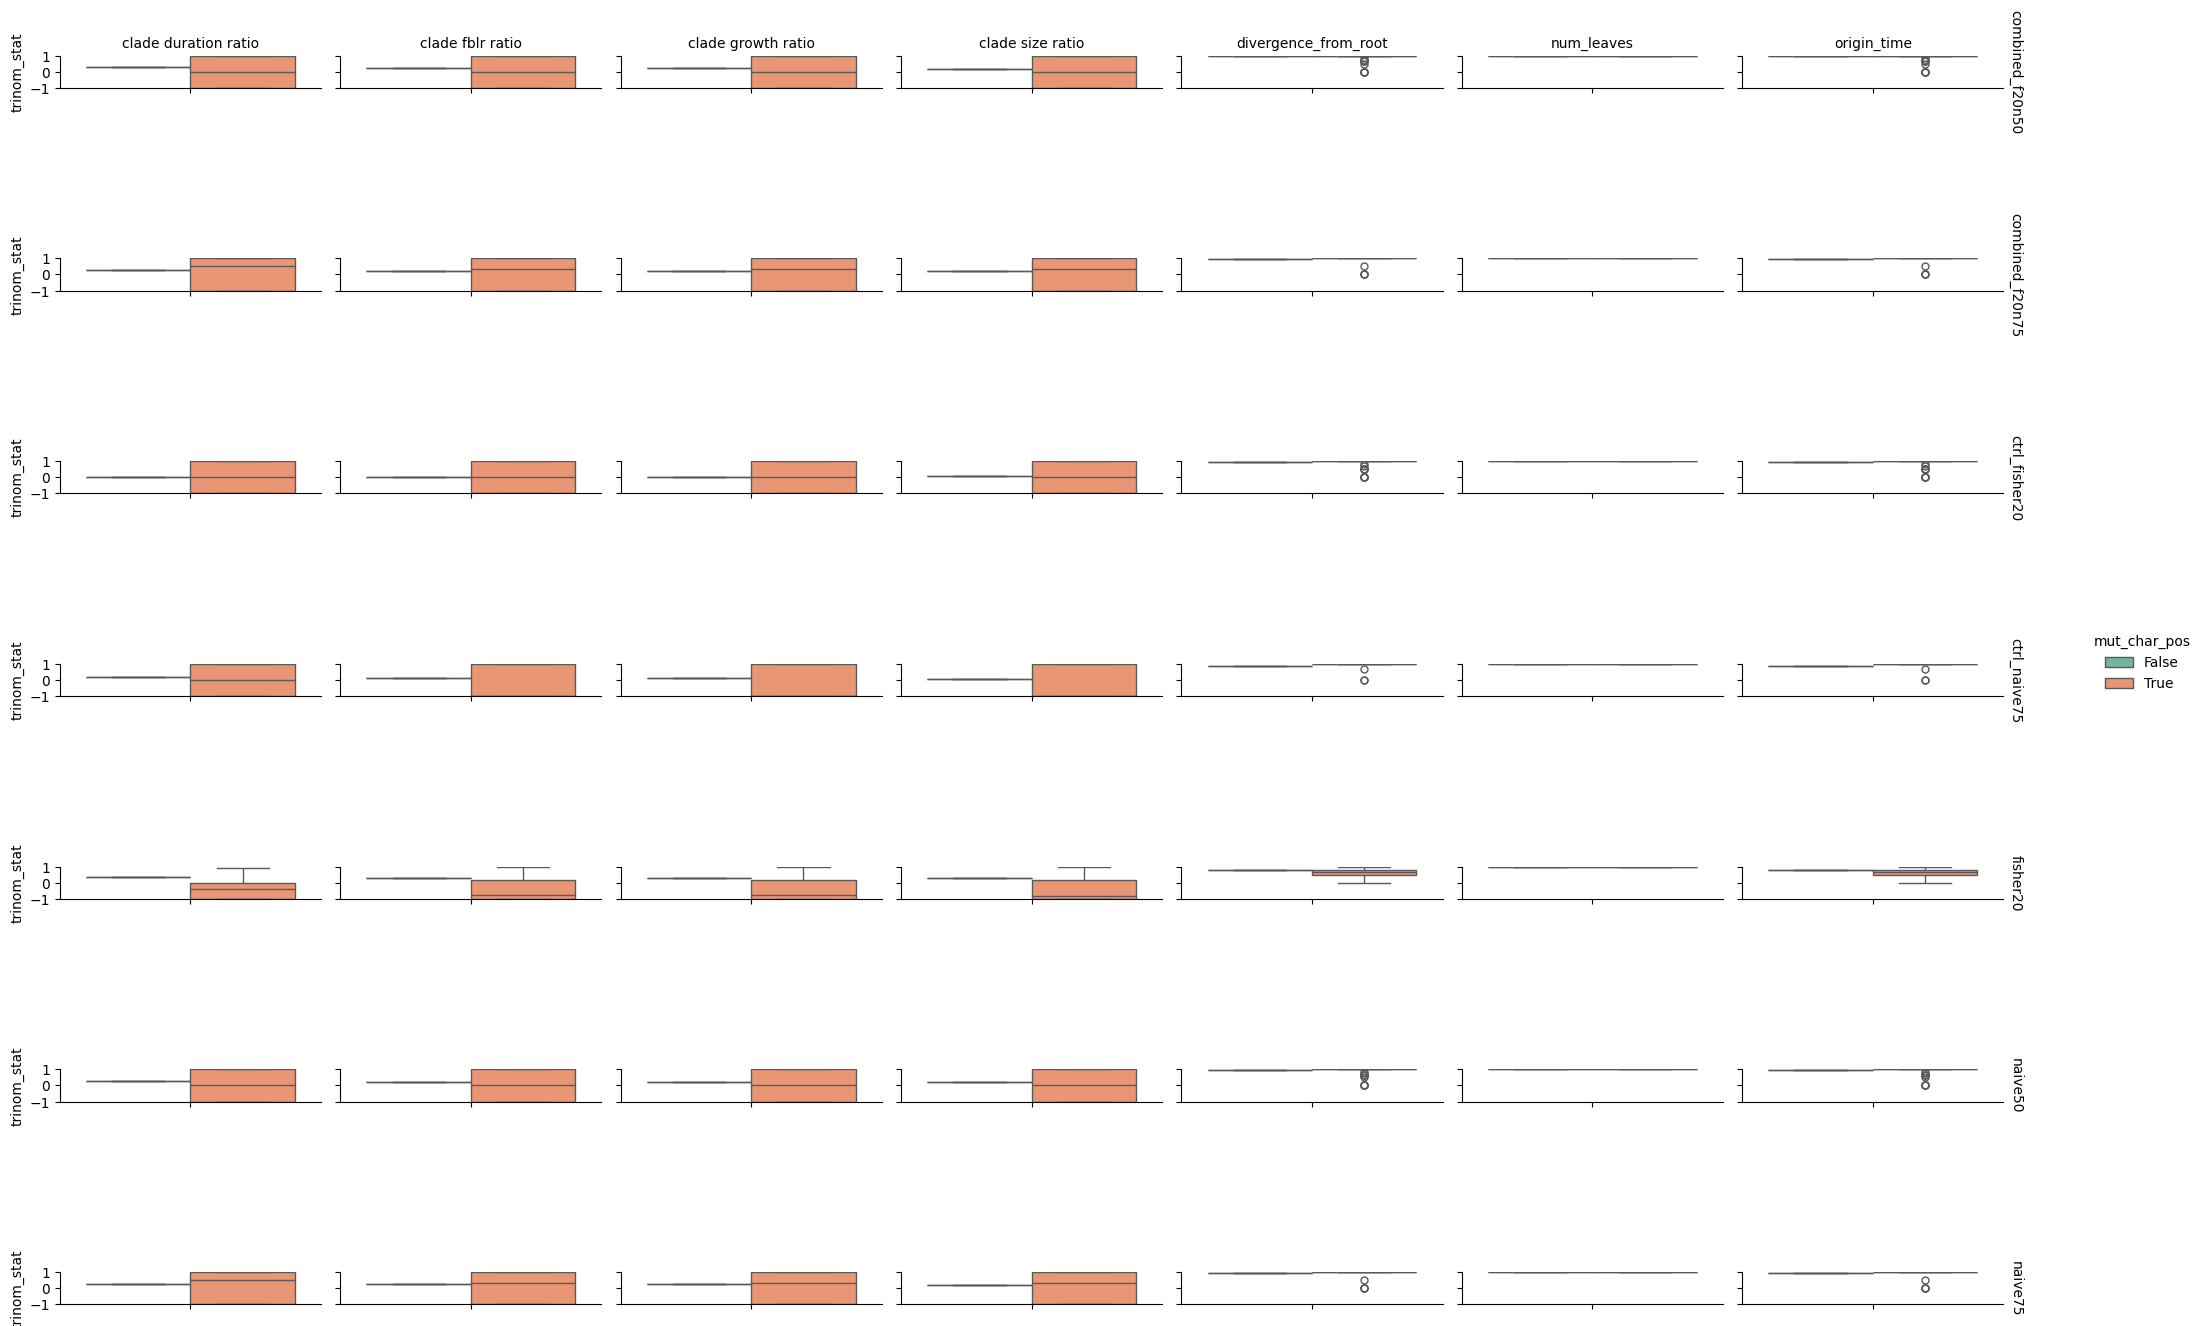

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


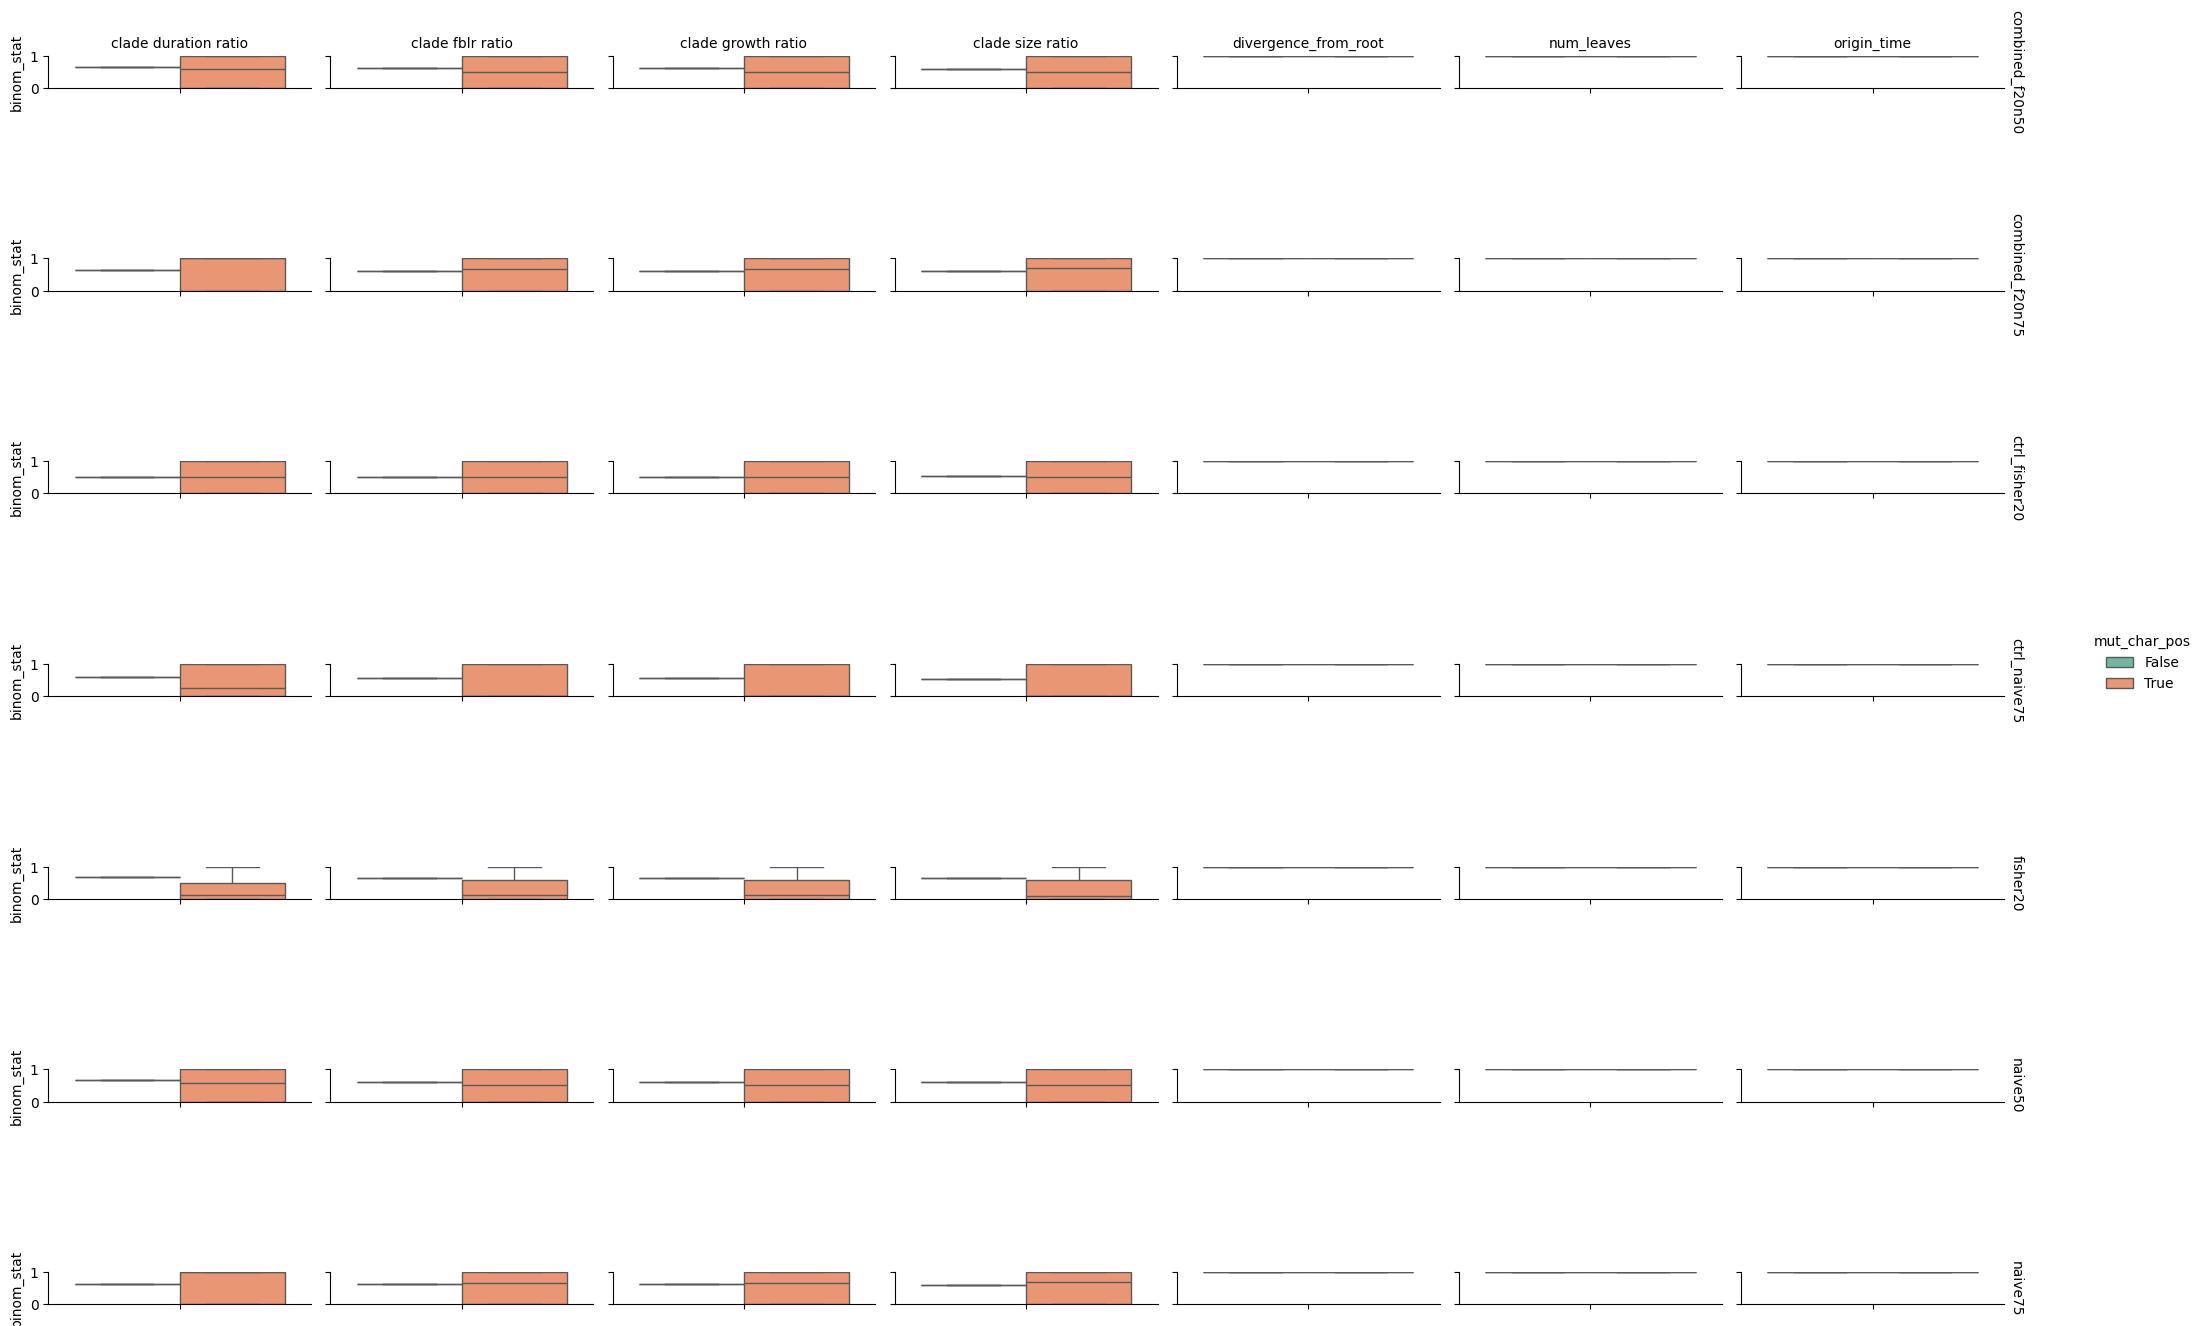

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


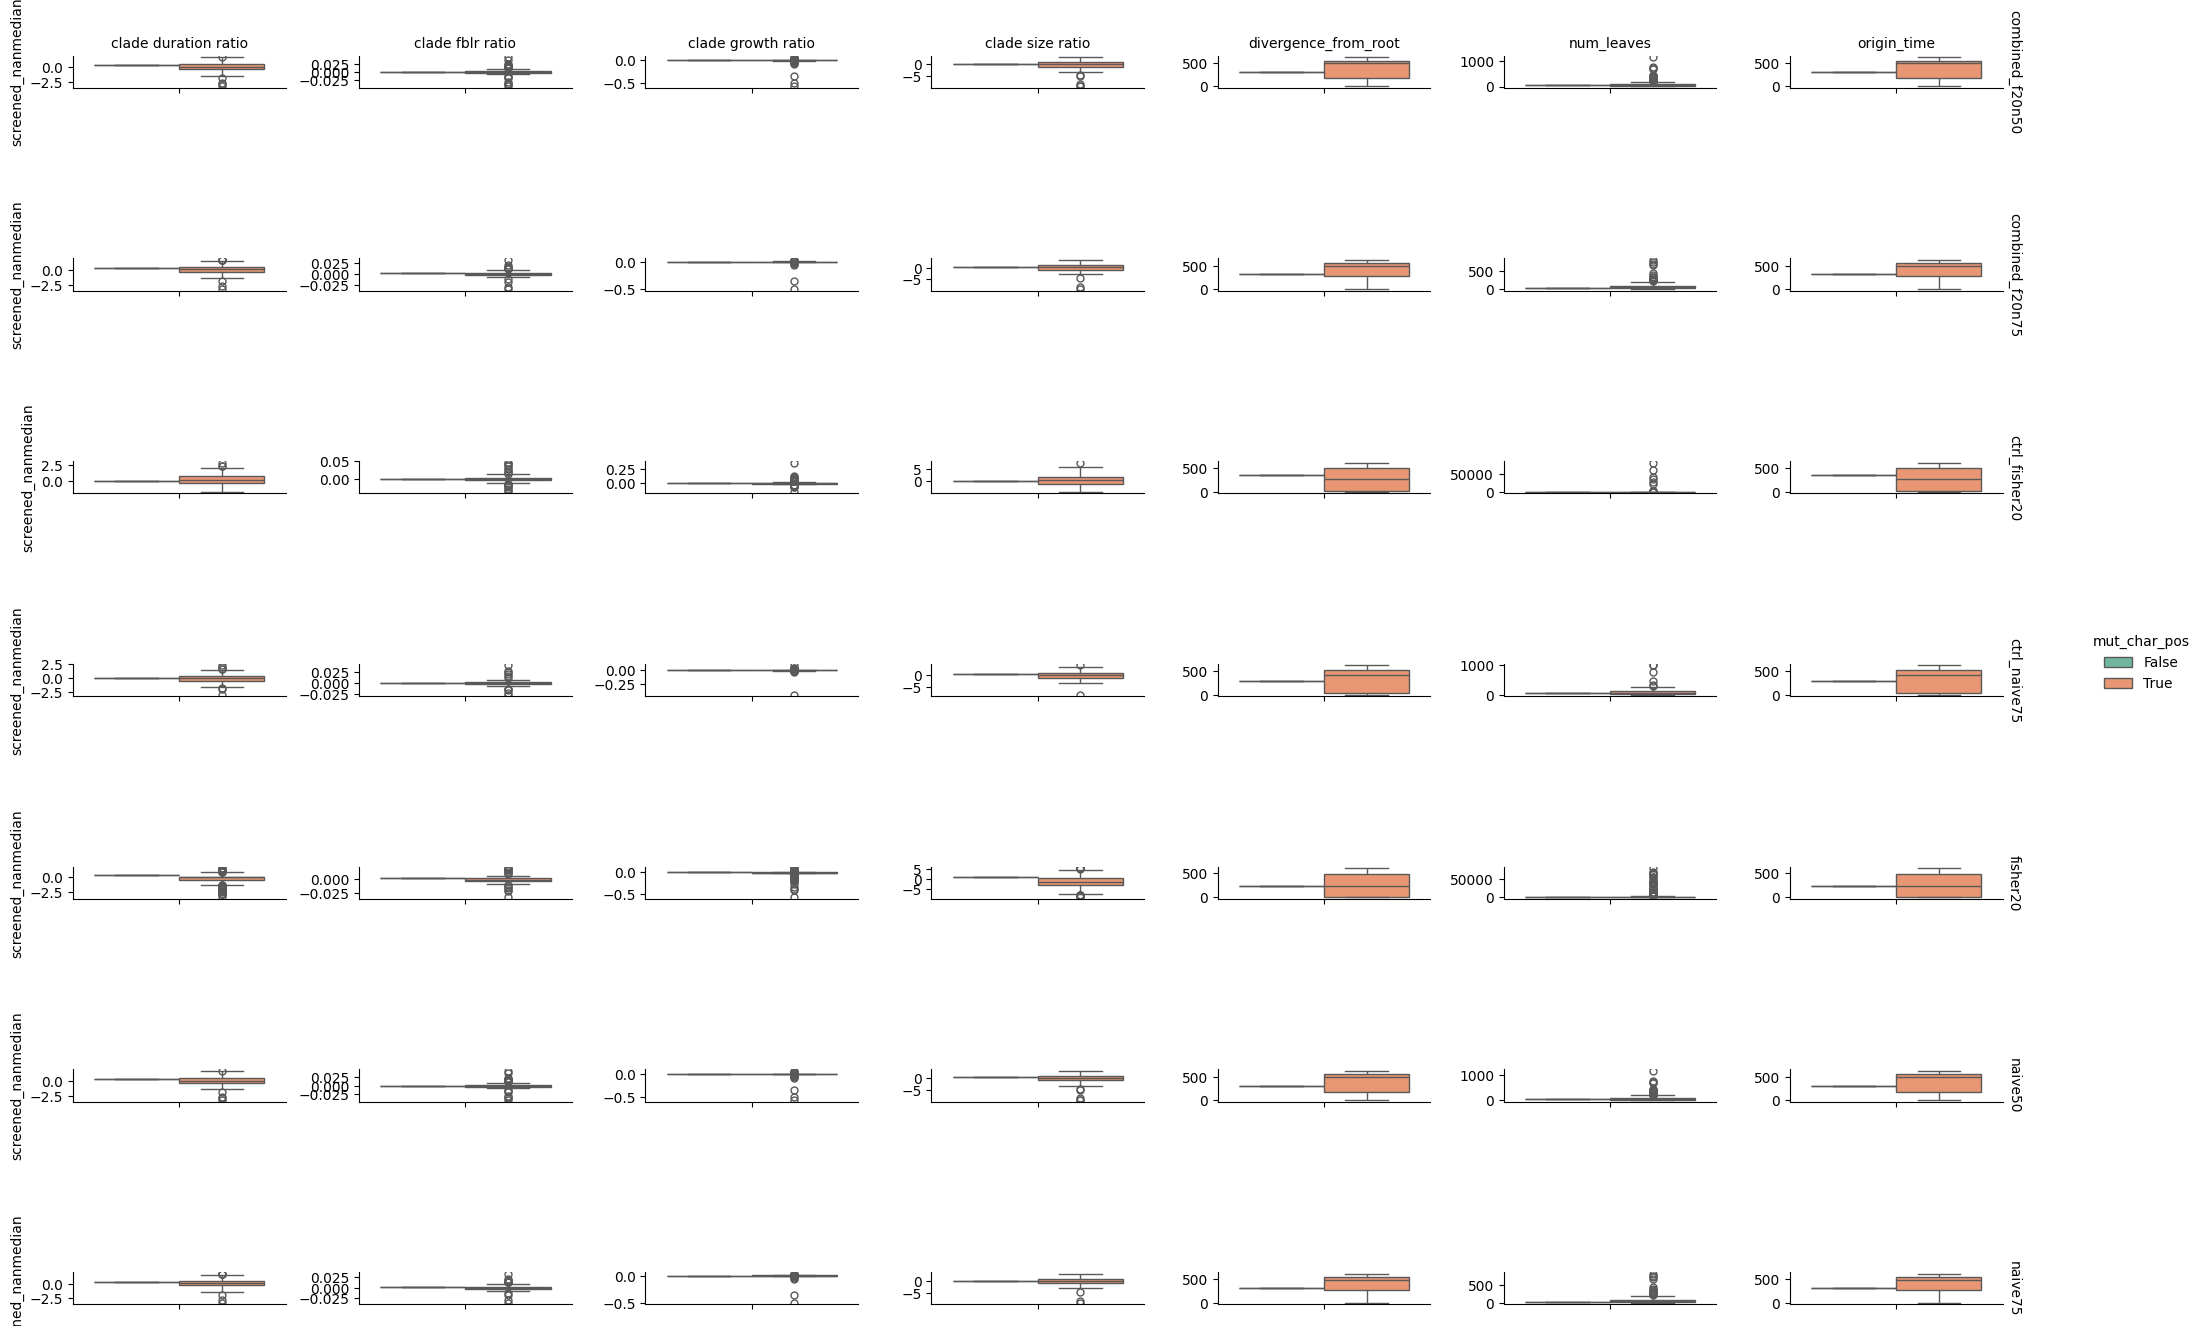

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


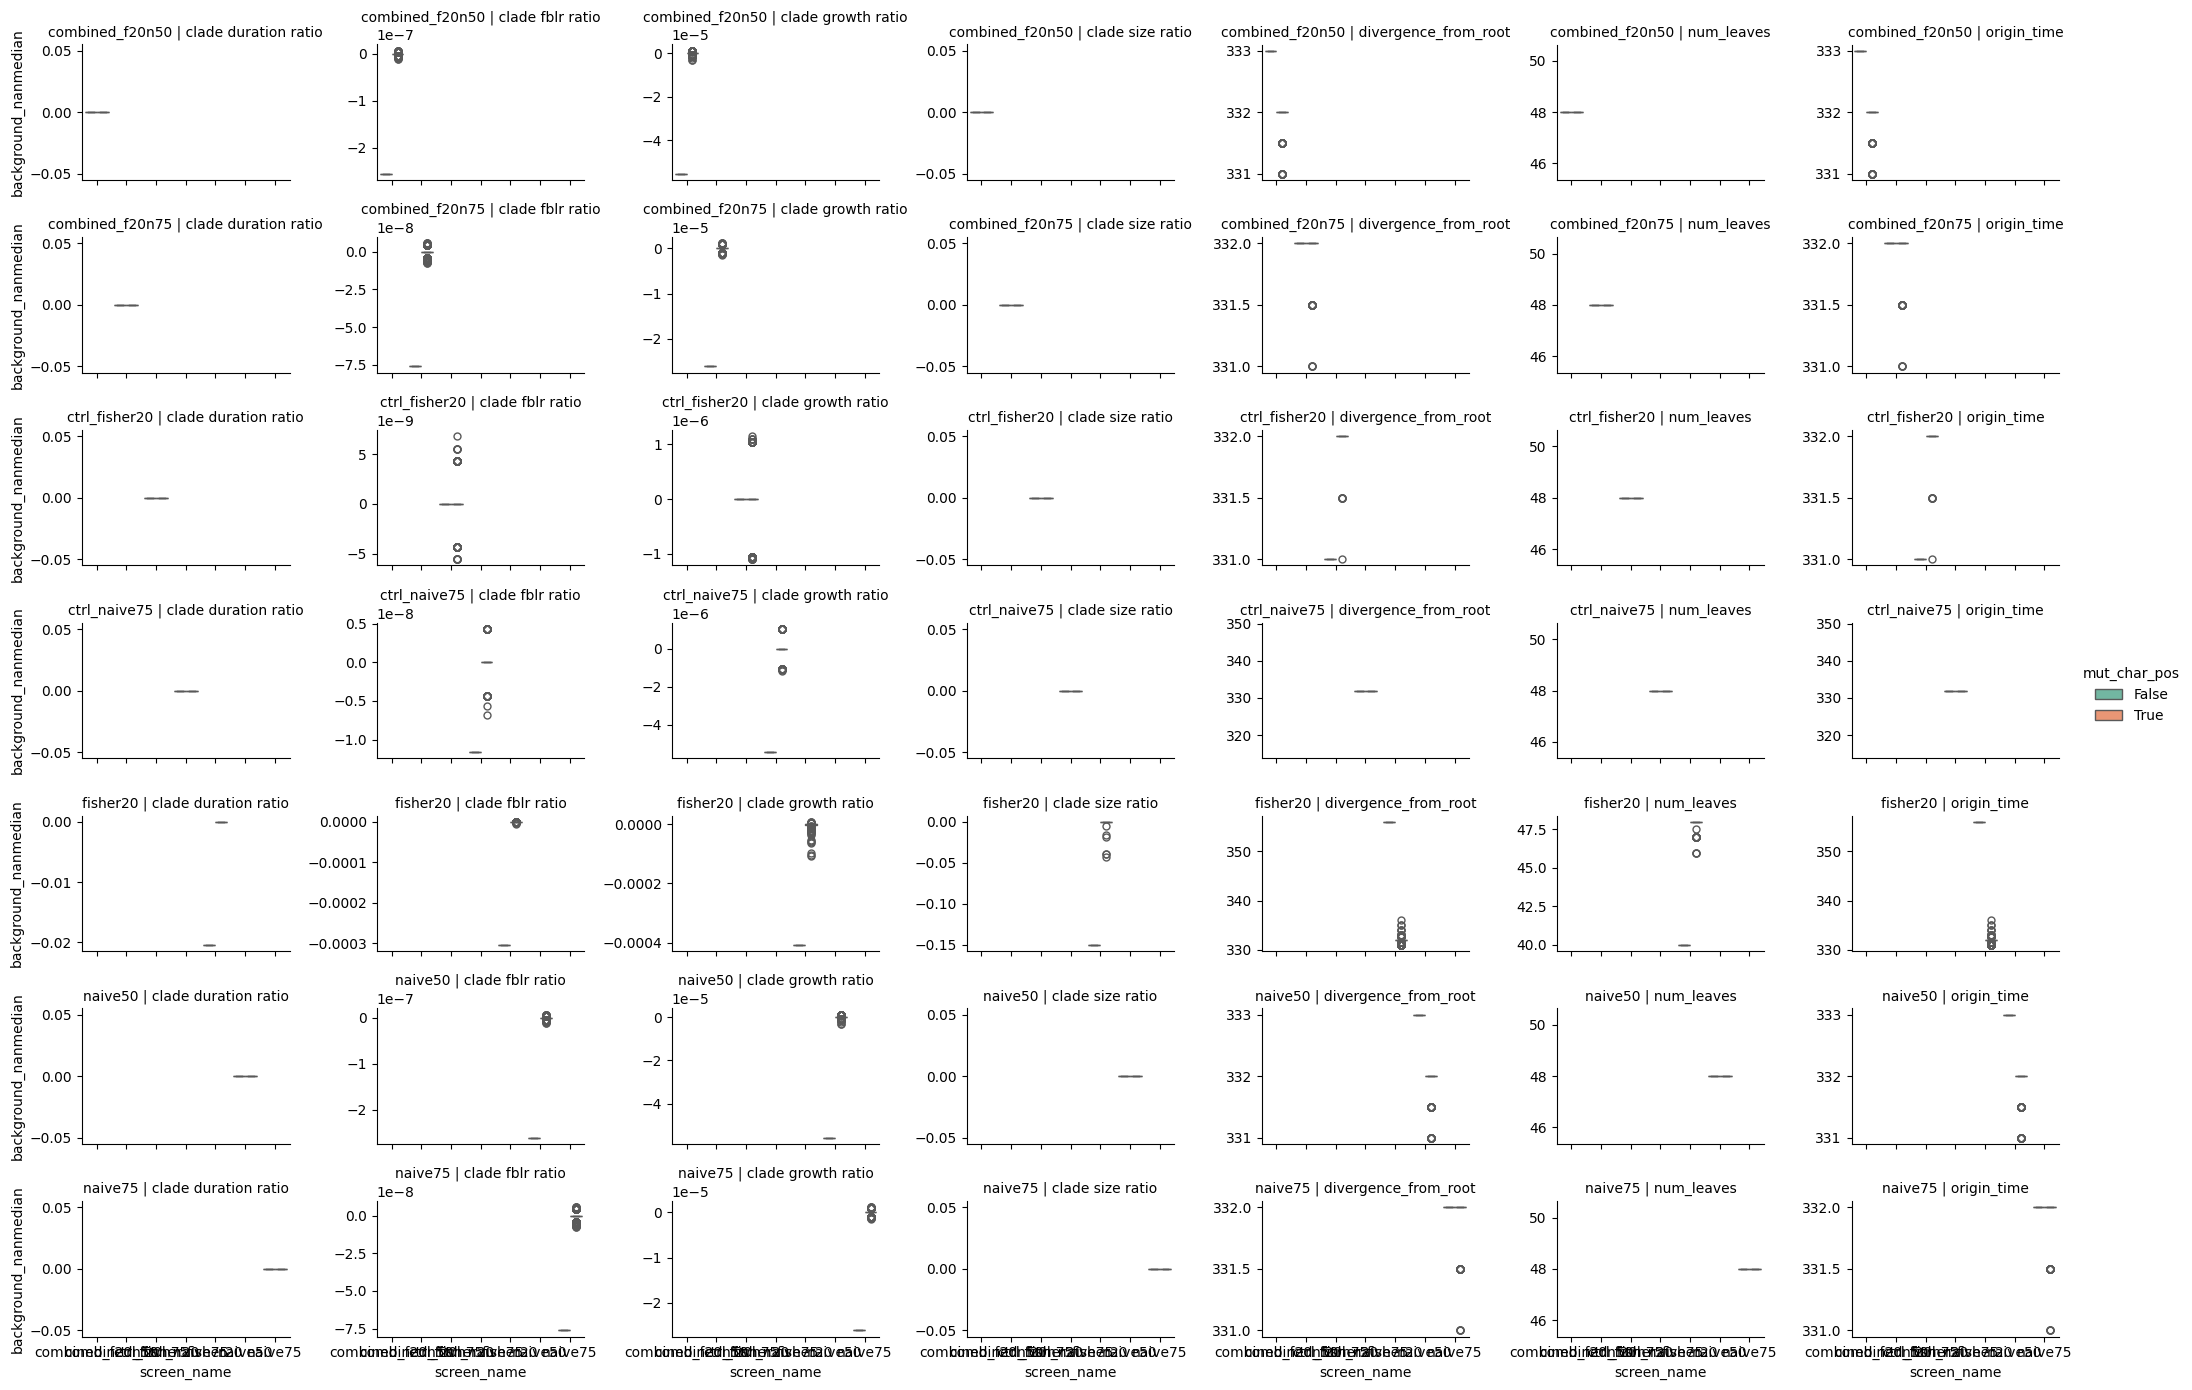

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
